---
author:
- 'Adrian E. Feiguin'
title: 'Computational Physics'
...

Ordinary differential equations
=========================================

Let’s consider a simple 1st order equation: 
$$\frac{dy}{dx}=f(x,y)$$

To solve this equation with a computer we need to **discretize** the differences: we
have to convert the differential equation into a “**finite differences**” equation. The simplest
solution is Euler’s method.

Euler’s method
--------------

Supouse that at a point $x_0$, the function $f$ has a value $y_0$. We
want to find the approximate value of $y$ in a point $x_1$ close to
$x_0$, $x_1=x_0+\Delta x$, with $\Delta x$ small. We assume that $f$,
the rate of change of $y$, is constant in this interval $\Delta x$.
Therefore we find: $$\begin{eqnarray}
&& dx \approx \Delta x &=&x_1-x_0, \\
&& dy \approx \Delta y &=&y_1-y_0,\end{eqnarray}$$ with
$y_1=y(x_1)=y(x_0+\Delta x)$. Then we re-write the differential equation in terms of discrete differences as:
$$\frac{\Delta y}{\Delta x}=f(x,y)$$ or 
$$\Delta y = f(x,y)\Delta x$$
and approximate the value of $y_1$ as
$$y_1=y_0+f(x_0,y_0)(x_1-x_0)$$ We can generalize this formula to find
the value of $y$ at $x_2=x_1+\Delta x$ as
$$y_{2}=y_1+f(x_1,y_1)\Delta x,$$ or in the general case:
$$y_{n+1}=y_n+f(x_n,y_n)\Delta x$$

This is a good approximation as long as $\Delta x$ is “small”. What is
small? Depends on the problem, but it is basically defined by the “rate
of change”, or “smoothness” of $f$. $f(x)$ has to behave smoothly and
without rapid variations in the interval $\Delta x$.

Notice that Euler’s method is equivalent to a 1st order Taylor expansion
about the point $x_0$. The “local error” calculating $x_1$ is then
$O(\Delta x^2)$. If we use the method $N$ times to calculate $N$
consecutive points, the propagated “global” error will be
$NO(\Delta x^2)\approx O(\Delta 
x)$. This error decreases linearly with decreasing step, so we need to
halve the step size to reduce the error in half. The numerical work for
each step consists of a single evaluation of $f$.

### Exercise 1.1: Newton’s law of cooling 

If the temperature difference between an object and its surroundings is
small, the rate of change of the temperature of the object is
proportional to the temperature difference: $$\frac{dT}{dt}=-r(T-T_s),$$
where $T$ is the temperature of the body, $T_s$ is the temperature of
the environment, and $r$ is a “cooling constant” that depends on the
heat transfer mechanism, the contact area with the environment and the
thermal properties of the body. The minus sign appears because if
$T>T_s$, the temperature must decrease.

Write a program to calculate the temperature of a body at a time $t$,
given the cooling constant $r$ and the temperature of the body at time
$t=0$. Plot the results for $r=0.1\frac{1}{min}$; $T_s=83^{\circ} C$, $T_0=10^{\circ}$
using different intervals $\Delta t$ and compare with exact (analytical)
results.

In [2]:
T0 = 10.   # initial temperature
Ts = 83.   # temp. of the environment
r = 0.1    # cooling rate
dt = 0.05  # time step
tmax = 60. # maximum time
nsteps = int(tmax/dt)  # number of steps

In [3]:
T = T0
for i in range(1,nsteps+1):
    new_T = T - r*(T-Ts)*dt
    T = new_T
    print ('{:20.18f}  {:20.18f}  {:20.18f}'.format(i,i*dt, T))
    # we can also do T = T - r*(T-Ts)*dt
    

1.000000000000000000  0.050000000000000003  10.365000000000000213
2.000000000000000000  0.100000000000000006  10.728175000000000239
3.000000000000000000  0.150000000000000022  11.089534125000000131
4.000000000000000000  0.200000000000000011  11.449086454374999278
5.000000000000000000  0.250000000000000000  11.806841022103125027
6.000000000000000000  0.300000000000000044  12.162806816992610237
7.000000000000000000  0.350000000000000033  12.516992782907646387
8.000000000000000000  0.400000000000000022  12.869407818993108705
9.000000000000000000  0.450000000000000011  13.220060779898142655
10.000000000000000000  0.500000000000000000  13.568960475998652626
11.000000000000000000  0.550000000000000044  13.916115673618659088
12.000000000000000000  0.600000000000000089  14.261535095250565064
13.000000000000000000  0.650000000000000022  14.605227419774312381
14.000000000000000000  0.700000000000000067  14.947201282675440126
15.000000000000000000  0.750000000000000000  15.287465276262063085
16.0

Let's try plotting the results. We first need to import the required libraries and methods

In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot 

Next, we create numpy arrays to store the (x,y) values 

In [5]:
my_time = np.zeros(nsteps)
my_temp = np.zeros(nsteps)

We have to re write the loop to store the values in the arrays. Remember that numpy arrays start from 0.

In [6]:
T = T0
my_temp[0] = T0
for i in range(1,nsteps):
    T = T - r*(T-Ts)*dt
    my_time[i] = i*dt
    my_temp[i] = T
    

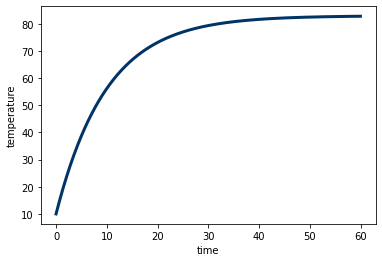

In [7]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

We could have saved effort by defining

In [8]:
my_time = np.linspace(0.,tmax,nsteps)

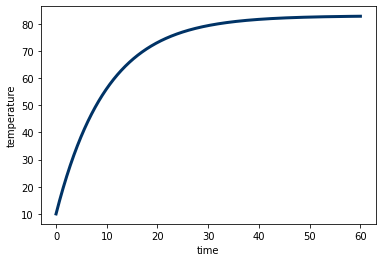

In [9]:
pyplot.plot(my_time, my_temp, color='#003366', ls='-', lw=3)
pyplot.xlabel('time')
pyplot.ylabel('temperature');

Alternatively, and in order to re use code in future problems, we could have created a function.

In [10]:
def euler(y, f, dx):
    """Computes y_new = y + f*dx
    
    Parameters
    ----------
    y  : float
        old value of y_n at x_n
    f  : float
        first derivative f(x,y) evaluated at (x_n,y_n)
    dx : float
        x step
    """
    
    return y + f*dx

In [11]:
T = T0
for i in range(1,nsteps):
    T = euler(T, -r*(T-Ts), dt)
    my_temp[i] = T


Actually, for this particularly simple case, calling a function may introduce unecessary overhead, but it is a an example that we will find useful for future applications. For a simple function like this we could have used a "lambda" function (more about lambda functions <a href="http://www.secnetix.de/olli/Python/lambda_functions.hawk">here</a>).

In [12]:
euler = lambda y, f, dx: y + f*dx 

Now, let's study the effects of different time steps on the convergence:

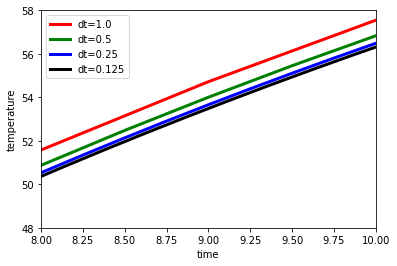

In [15]:
dt = 1.
#my_color = ['#003366','#663300','#660033','#330066']
my_color = ['red', 'green', 'blue', 'black']
for j in range(0,4):
    nsteps = int(tmax/dt)    #the arrays will have different size for different time steps
    my_time = np.linspace(dt,tmax,nsteps) 
    my_temp = np.zeros(nsteps)
    T = T0
    for i in range(0,nsteps):
        T = euler(T, -r*(T-Ts), dt)
        my_temp[i] = T
        
    pyplot.plot(my_time, my_temp, color=my_color[j], ls='-', lw=3, label="dt="+str(dt))
    dt = dt/2.

pyplot.xlabel('time');
pyplot.ylabel('temperature');
pyplot.legend()
pyplot.xlim(8,10)
pyplot.ylim(48,58);

### Challenge 1.1

To properly study convergence, one possibility it so look at the result at a given time, for different time steps. Modify the previous program to print the temperature at $t=10$ as a function of $\Delta t$. 